<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64
Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


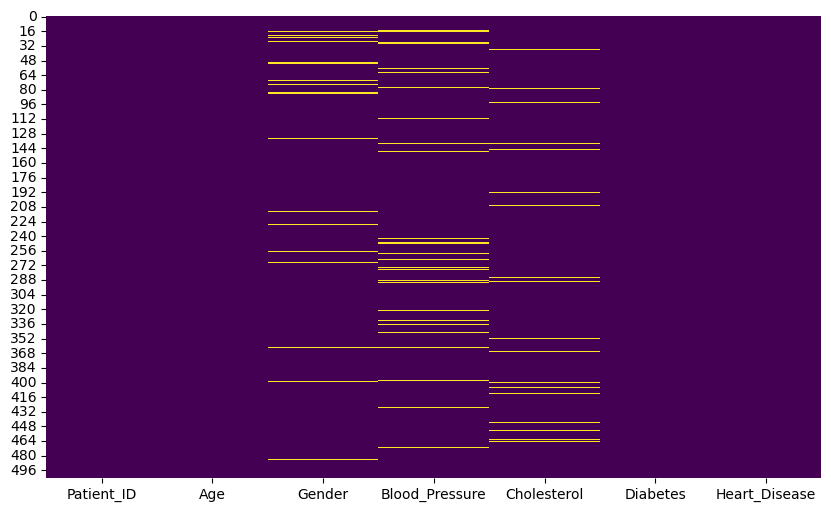

ValueError: could not convert string to float: 'Male'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r"C:\Users\mvdsa\Desktop\AD-Assignments\AD-Assignments\Day_15_Healthcare_Data.csv")
print(df.info())
print(df.isna().sum())
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.show()
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
knn_imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :] = knn_imputer.fit_transform(df)
for col in df.columns:
    if df[col].isna().sum() > 0:
        train_df = df.dropna()
        X_train = train_df.drop(columns=[col])
        y_train = train_df[col]
        reg = LinearRegression()
        reg.fit(X_train, y_train)
        df[col].fillna(reg.predict(df.drop(columns=[col])), inplace=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
df.to_csv("cleaned_healthcare_dataset.csv", index=False)